1)Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = 35, 45, 190, 200, 40, 70, 54, 150, 120, 110, ks = 401, 574, 874, 919, 459, 739, 653, 902, 746, 832. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Расчет с использованием математических формул с intercept 
ŷ = b0 + b1 ∗ x

Коэффициент b1: 2.62
Коэффициент b0: 444.18
Уравнение линейной регрессии: ŷ = 444.18 + 2.62 * x
Функция потерь: mse = 6470.41


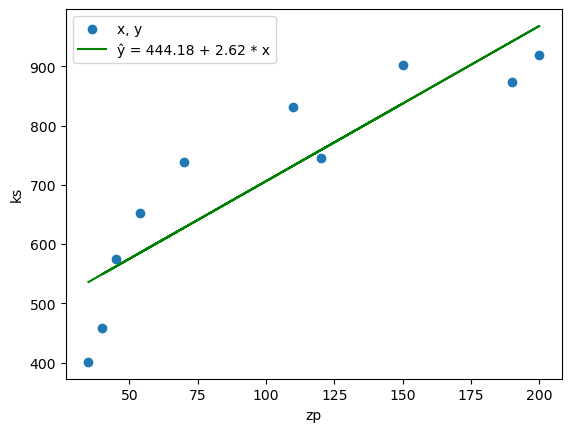

In [3]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

print(f'Расчет с использованием математических формул с intercept \nŷ = b0 + b1 ∗ x')
print()

n = len(x)

b1 = (np.mean(x*y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x)**2)
print(f'Коэффициент b1: {round(b1, 2)}')
b0 = np.mean(y) - b1*np.mean(x)
print(f'Коэффициент b0: {round(b0, 2)}')

y_pred = b0 + b1 * x
print(f'Уравнение линейной регрессии: ŷ = {round(b0, 2)} + {round(b1, 2)} * x')

print(f'Функция потерь: mse = {round(((y - y_pred)**2).sum() / n, 2)}')

plt.scatter(x, y, label = 'x, y')
plt.plot(x, y_pred, 'g', label = 'ŷ = 444.18 + 2.62 * x')
plt.xlabel('zp')
plt.ylabel('ks')
plt.legend()

Расчет матричным методом без intercept 
ŷ = b1 ∗ x

Коэффициент b1: 5.89
Уравнение линейной регрессии: ŷ = 5.89 * x
Функция потерь: mse = 56516.8584157194


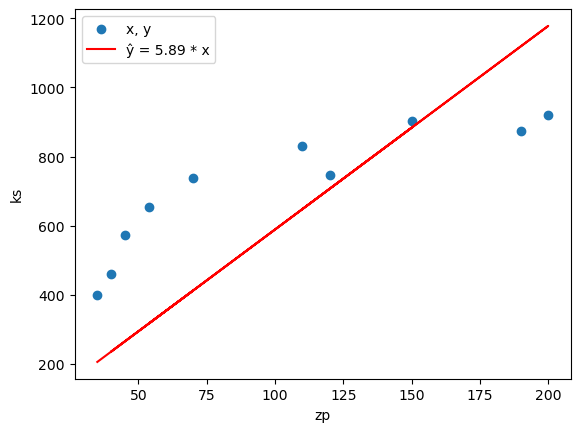

In [4]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
print(f'Расчет матричным методом без intercept \nŷ = b1 ∗ x')
print()

x1 = x.reshape((10, 1))
# print(x)
y1 = y.reshape((10, 1))
# print(y)

B = np.dot(np.linalg.inv(np.dot(x1.T,x1)), x1.T @ y1)
print(f'Коэффициент b1: {round(B[0,0], 2)}')

y_pred = B[0,0] * x
print(f'Уравнение линейной регрессии: ŷ = {round(B[0,0], 2)} * x')

print(f'Функция потерь: mse = {((y - y_pred)**2).sum() / n}')

plt.scatter(x1, y1, label = 'x, y')
plt.plot(x1, y_pred, 'r', label = 'ŷ = 5.89 * x')
plt.xlabel('zp')
plt.ylabel('ks')
plt.legend()

2)Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [5]:
# Функция потерь 𝑚𝑠𝑒 = (∑(𝑦 − 𝑦_𝑝𝑟𝑒𝑑)^2) / 𝑛
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
print(f'Расчет методом градиентного спуска без intercept \nŷ = b1 ∗ x')
print()

def mse_(B1, y=y, x=x, n=10):
    return ((B1 * x - y)**2).sum() / n

alpha = 1e-6
b1 = 0.1
n=10

for i in range(1001):
    b1 -= alpha * (2/n) * np.sum((b1*x - y) * x)
    if i%100 == 0:
        print(f'Iteration = {i}, b1 = {b1}, mse = {mse_(b1)}')
print()

print(f'Функция потерь при b1 = {round(b1, 2)}: mse = {round(mse_(b1), 2)}')

print(f'Коэффициент b1: {round(b1, 2)}')

print(f'Уравнение линейной регрессии: ŷ = {round(b1, 2)} * x')

Расчет методом градиентного спуска без intercept 
ŷ = b1 ∗ x

Iteration = 0, b1 = 0.25952808, mse = 493237.7212546963
Iteration = 100, b1 = 5.54537842245223, mse = 58151.31823171113
Iteration = 200, b1 = 5.868748638669329, mse = 56522.97550129376
Iteration = 300, b1 = 5.888531320728348, mse = 56516.88130936019
Iteration = 400, b1 = 5.8897415574471985, mse = 56516.85850140053
Iteration = 500, b1 = 5.889815595583751, mse = 56516.858416040064
Iteration = 600, b1 = 5.889820124983314, mse = 56516.85841572062
Iteration = 700, b1 = 5.889820402076462, mse = 56516.85841571941
Iteration = 800, b1 = 5.88982041902807, mse = 56516.8584157194
Iteration = 900, b1 = 5.889820420065112, mse = 56516.85841571941
Iteration = 1000, b1 = 5.8898204201285544, mse = 56516.85841571941

Функция потерь при b1 = 5.89: mse = 56516.86
Коэффициент b1: 5.89
Уравнение линейной регрессии: ŷ = 5.89 * x
